MEMASUKAN DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/content/HomeC.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
data = '/content/HomeC.csv'
df = pd.read_csv(data)


In [5]:
df.shape

(12073, 32)

In [ ]:
df.head()

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0  1451624400  0.932833  0.003483            0.932833         0.000033   
1  1451624401  0.934333  0.003467            0.934333         0.000000   
2  1451624402  0.931817  0.003467            0.931817         0.000017   
3  1451624403  1.022050  0.003483            1.022050         0.000017   
4  1451624404  1.139400  0.003467            1.139400         0.000133   

   Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0        0.020700        0.061917          0.442633     0.124150   
1        0.020717        0.063817          0.444067     0.124000   
2        0.020700        0.062317          0.446067     0.123533   
3        0.106900        0.068517          0.446583     0.123133   
4        0.236933        0.063983          0.446533     0.122850   

   Wine cellar [kW]  ...  visibility  summary  apparentTemperature  pressure  \
0          0.006983  ...        10.0    Clear                29.26   1016.91   
1          0.006983  ...        10.0    Clear                29.26   1016.91   
2          0.006983  ...        10.0    Clear                29.26   1016.91   
3          0.006983  ...        10.0    Clear                29.26   1016.91   
4          0.006850  ...        10.0    Clear                29.26   1016.91   

   windSpeed  cloudCover  windBearing  precipIntensity  dewPoint  \
0       9.18  cloudCover        282.0              0.0      24.4   
1       9.18  cloudCover        282.0              0.0      24.4   
2       9.18  cloudCover        282.0              0.0      24.4   
3       9.18  cloudCover        282.0              0.0      24.4   
4       9.18  cloudCover        282.0              0.0      24.4   

   precipProbability  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 32 columns]

Dari output tersebut, kita dapat melihat bahwa dataframe memiliki kolom-kolom seperti 'time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]', 'Wine cellar [kW]', dan beberapa kolom lainnya yang berkaitan dengan kondisi cuaca seperti 'summary', 'apparentTemperature', 'pressure', 'windSpeed', dan sebagainya.

Dengan melihat bentuk data ini, kita dapat memahami jenis informasi yang terkandung dalam dataset tersebut, seperti penggunaan energi di rumah pintar, kondisi cuaca, dan lain-lain. Ini merupakan langkah penting dalam eksplorasi data sebelum melakukan analisis lebih lanjut.

In [6]:
col_names = df.columns

col_names

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [9]:
df.isnull().sum()

time                   0
use [kW]               0
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [10]:
round(df.describe(),2)

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  1.207300e+04  12073.00  12072.00            12072.00         12072.00   
mean   1.451630e+09      1.07      0.06                1.07             0.04   
std    3.485320e+03      0.73      0.12                0.73             0.22   
min    1.451624e+09      0.00      0.00                0.00             0.00   
25%    1.451627e+09      0.56      0.00                0.56             0.00   
50%    1.451630e+09      0.91      0.00                0.91             0.00   
75%    1.451633e+09      1.41      0.03                1.41             0.00   
max    1.451636e+09      7.38      0.55                7.38             1.38   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
count        12072.00        12072.00          12072.00     12072.00   
mean             0.22            0.23              0.11         0.06   
std              0.22            0.25              0.13         0.07   
min              0.02            0.06              0.04         0.00   
25%              0.02            0.06              0.04         0.01   
50%              0.10            0.07              0.05         0.01   
75%              0.48            0.50              0.09         0.12   
max              1.85            0.78              0.72         0.85   

       Wine cellar [kW]  ...  temperature  humidity  visibility  \
count          12072.00  ...     12072.00  12072.00    12072.00   
mean               0.02  ...        26.53      0.62        9.84   
std                0.03  ...        10.28      0.13        0.38   
min                0.01  ...         4.91      0.22        7.62   
25%                0.01  ...        19.07      0.56        9.90   
50%                0.01  ...        29.25      0.62       10.00   
75%                0.01  ...        35.06      0.73       10.00   
max                0.13  ...        42.55      0.85       10.00   

       apparentTemperature  pressure  windSpeed  windBearing  precipIntensity  \
count             12072.00  12072.00   12072.00     12072.00          12072.0   
mean                 20.40   1021.87       6.35       207.87              0.0   
std                  12.00      8.56       3.18       110.54              0.0   
min                  -8.54   1007.03       0.22         0.00              0.0   
25%                  12.74   1014.21       4.07       108.00              0.0   
50%                  22.76   1023.80       6.18       243.00              0.0   
75%                  30.36   1028.15       8.00       279.00              0.0   
max                  40.87   1036.62      14.54       359.00              0.0   

       dewPoint  precipProbability  
count  12072.00           12072.00  
mean      14.74               0.00  
std       10.40               0.00  
min       -5.38               0.00  
25%        7.22               0.00  
50%       17.27               0.00  
75%       23.76               0.00  
max       33.28               0.02  

[8 rows x 29 columns]

Text(0, 0.5, 'windSpeed')

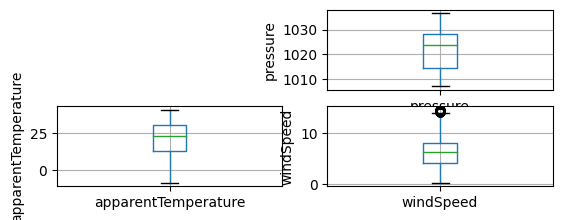

In [11]:

plt.subplot(4, 2, 6)
fig = df.boxplot(column='pressure')
fig.set_title('')
fig.set_ylabel('pressure')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='apparentTemperature')
fig.set_title('')
fig.set_ylabel('apparentTemperature')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='windSpeed')
fig.set_title('')
fig.set_ylabel('windSpeed')

 akan dihasilkan sebuah plot dengan 3 boxplot yang menampilkan distribusi data dari kolom 'pressure', 'apparentTemperature', dan 'windSpeed' dalam dataset df. Boxplot adalah plot yang menampilkan distribusi data dengan menunjukkan nilai minimum, kuartil pertama, median, kuartil ketiga, dan nilai maksimum.

```
# This is formatted as code
```



Text(0, 0.5, 'Number of Smart Home')

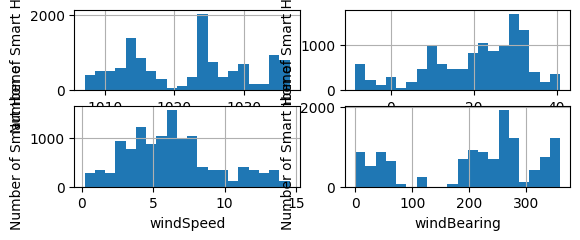

In [12]:
# plot histogram to check distribution




plt.subplot(4, 2, 5)
fig = df['pressure'].hist(bins=20)
fig.set_xlabel('pressure')
fig.set_ylabel('Number of Smart Home')



plt.subplot(4, 2, 6)
fig = df['apparentTemperature'].hist(bins=20)
fig.set_xlabel('apparentTemperature')
fig.set_ylabel('Number of Smart Home')



plt.subplot(4, 2, 7)
fig = df['windSpeed'].hist(bins=20)
fig.set_xlabel('windSpeed')
fig.set_ylabel('Number of Smart Home')


plt.subplot(4, 2, 8)
fig = df['windBearing'].hist(bins=20)
fig.set_xlabel('windBearing')
fig.set_ylabel('Number of Smart Home')


1. Histogram pertama (kiri atas) menunjukkan distribusi nilai 'pressure'. Terlihat puncak yang tinggi sekitar nilai 1020, yang mengindikasikan bahwa sebagian besar nilai 'pressure' berada di sekitar angka tersebut.
2. Histogram kedua (kanan atas) menunjukkan distribusi nilai 'apparentTemperature'. Distribusinya tampak menyebar di sekitar nilai 0 hingga 20.
3. Histogram ketiga (kiri bawah) menunjukkan distribusi nilai 'windSpeed'. Histogram ini menunjukkan bahwa sebagian besar nilai 'windSpeed' berada di sekitar 0 hingga 5, dengan beberapa nilai ekstrim yang lebih tinggi.
4. Histogram keempat (kanan bawah) menunjukkan distribusi nilai 'windBearing'. Histogram ini memiliki puncak di sekitar nilai 200, yang menunjukkan bahwa sebagian besar nilai 'windBearing' berada di sekitar angka tersebut.

In [13]:
X = df.drop(['windBearing'], axis=1)

y = df['windBearing']

In [14]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Membagi data menjadi data latih dan data uji sangat penting dalam pemodelan machine learning. Data latih digunakan untuk melatih atau mengoptimalkan model, sedangkan data uji digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya. Hal ini membantu menghindari overfitting, di mana model hanya belajar dari pola-pola spesifik pada data latih tetapi gagal menggeneralisasi pada data baru.

Dengan membagi data menjadi data latih dan data uji, disini dapat melatih model pada data latih, lalu mengevaluasi performa model pada data uji yang terpisah. Ini memberikan perkiraan yang lebih realistis tentang bagaimana model akan bekerja pada data baru di dunia nyata.

In [15]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((9658, 31), (2415, 31))

In [16]:
cols = X_train.columns

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Asumsi Anda memiliki dataframe 'df'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Konversi kolom kategorik ke string
df[categorical_cols] = df[categorical_cols].astype(str)

# One-hot encoding pada kolom kategorikal
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(df[categorical_cols])
encoded_categorical = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names_out())

# Standarisasi fitur numerik
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df[numeric_cols])
scaled_numeric = pd.DataFrame(scaled_numeric, columns=numeric_cols)

# Gabungkan fitur numerik dan kategorikal
X = pd.concat([scaled_numeric, encoded_categorical], axis=1)

# Pisahkan data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Mengimpor library yang dibutuhkan, yaitu StandardScaler, OneHotEncoder dari sklearn.preprocessing dan pandas.
2. Memisahkan kolom numerik (float64 dan int64) dan kolom kategorikal (object) dari DataFrame 'df'.
3. Mengonversi kolom kategorikal menjadi tipe string.
4. Melakukan one-hot encoding pada kolom kategorikal menggunakan OneHotEncoder dari scikit-learn. One-hot encoding adalah teknik untuk mengubah data kategorikal menjadi representasi numerik yang dapat digunakan dalam pemodelan machine learning.
5. Melakukan standardisasi fitur numerik menggunakan StandardScaler dari scikit-learn. Standardisasi ini penting untuk memastikan fitur dengan skala yang berbeda memiliki bobot yang sama dalam proses pemodelan.
6. Menggabungkan fitur numerik yang telah distandarisasi dan fitur kategorikal yang telah dilakukan one-hot encoding menjadi satu DataFrame 'X'.
7. Memisahkan data menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) menggunakan fungsi train_test_split dari sklearn.model_selection dengan rasio 80:20 (test_size=0.2) dan random_state=42 untuk memastikan hasil pemisahan data selalu sama.

In [18]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [19]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [20]:
X_train.describe()

time use [kW] gen [kW] House overall [kW] Dishwasher [kW]  \
count  0.0      0.0      0.0                0.0             0.0   
mean   NaN      NaN      NaN                NaN             NaN   
std    NaN      NaN      NaN                NaN             NaN   
min    NaN      NaN      NaN                NaN             NaN   
25%    NaN      NaN      NaN                NaN             NaN   
50%    NaN      NaN      NaN                NaN             NaN   
75%    NaN      NaN      NaN                NaN             NaN   
max    NaN      NaN      NaN                NaN             NaN   

      Furnace 1 [kW] Furnace 2 [kW] Home office [kW] Fridge [kW]  \
count            0.0            0.0              0.0         0.0   
mean             NaN            NaN              NaN         NaN   
std              NaN            NaN              NaN         NaN   
min              NaN            NaN              NaN         NaN   
25%              NaN            NaN              NaN         NaN   
50%              NaN            NaN              NaN         NaN   
75%              NaN            NaN              NaN         NaN   
max              NaN            NaN              NaN         NaN   

      Wine cellar [kW]  ... humidity visibility summary apparentTemperature  \
count              0.0  ...      0.0        0.0     0.0                 0.0   
mean               NaN  ...      NaN        NaN     NaN                 NaN   
std                NaN  ...      NaN        NaN     NaN                 NaN   
min                NaN  ...      NaN        NaN     NaN                 NaN   
25%                NaN  ...      NaN        NaN     NaN                 NaN   
50%                NaN  ...      NaN        NaN     NaN                 NaN   
75%                NaN  ...      NaN        NaN     NaN                 NaN   
max                NaN  ...      NaN        NaN     NaN                 NaN   

      pressure windSpeed cloudCover precipIntensity dewPoint precipProbability  
count      0.0       0.0        0.0             0.0      0.0               0.0  
mean       NaN       NaN        NaN             NaN      NaN               NaN  
std        NaN       NaN        NaN             NaN      NaN               NaN  
min        NaN       NaN        NaN             NaN      NaN               NaN  
25%        NaN       NaN        NaN             NaN      NaN               NaN  
50%        NaN       NaN        NaN             NaN      NaN               NaN  
75%        NaN       NaN        NaN             NaN      NaN               NaN  
max        NaN       NaN        NaN             NaN      NaN               NaN  

[8 rows x 31 columns]

In [21]:
from sklearn.impute import SimpleImputer

# Inisialisasi SimpleImputer dengan strategi pengisian yang diinginkan
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai yang hilang dalam data X
X_imputed = imputer.fit_transform(X)


In [22]:
# Impor library yang diperlukan
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Contoh data (ganti dengan data Anda)
X_train = np.array([[1, 2], [3, 4], [5, 6]])
y_train = np.array([0, 1, 0])
X_test = np.array([[7, 8], [9, 10]])
y_test = np.array([1, 0])

# Membuat instance classifier SVC dengan hyperparameter default
clf = SVC()

# Melakukan pelatihan model dengan data training
clf.fit(X_train, y_train)

# Membuat prediksi pada data testing
y_pred = clf.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy score with default hyperparameters: {accuracy:0.4f}')

Model accuracy score with default hyperparameters: 0.5000


Untuk memulai proses klasifikasi menggunakan Support Vector Machines (SVM) dalam Python, langkah pertama adalah mengimpor library yang dibutuhkan untuk analisis numerik dan evaluasi model. NumPy digunakan untuk operasi numerik, sementara dari library scikit-learn (sklearn), kita mengimpor kelas SVC untuk implementasi SVM dan accuracy_score dari sklearn.metrics untuk mengukur akurasi model.

Selanjutnya, kita perlu menyiapkan data contoh untuk keperluan demonstrasi. Data ini dibuat menggunakan NumPy arrays dan terdiri dari empat bagian: X_train (fitur-fitur data training), y_train (label kelas data training), X_test (fitur-fitur data testing), dan y_test (label kelas data testing).

Setelah data siap, langkah selanjutnya adalah membuat instance classifier SVM. Dalam contoh ini, kami menggunakan hyperparameter default yang disediakan oleh library scikit-learn.

Kemudian, kita melakukan pelatihan model dengan memasukkan data training (X_train dan y_train) ke dalam classifier SVM yang telah dibuat sebelumnya. Ini dilakukan untuk menghasilkan model yang dapat memahami pola dan relasi antara fitur dan label.

Setelah model dilatih, kita menggunakan model tersebut untuk membuat prediksi pada data testing (X_test). Hasil prediksi disimpan dalam variabel y_pred.

Untuk mengevaluasi performa model, kita menghitung akurasi model dengan membandingkan prediksi (y_pred) dengan label sebenarnya (y_test) menggunakan accuracy_score. Akurasi model memberikan gambaran tentang seberapa baik model dapat memprediksi label kelas yang benar.

Akhirnya, hasil akurasi model dengan hyperparameter default dicetak ke layar sebagai hasil akhir dari proses klasifikasi yang telah dilakukan.

In [23]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.5000


In [24]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.5000


In [25]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.5000


In [26]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0)


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.5000


In [27]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.5000


In [28]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 0, 0])

In [29]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6667


In [30]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.6667
Test set score: 0.5000


In [31]:
# Impor library NumPy dan Pandas
import numpy as np
import pandas as pd

# Mengonversi y_test menjadi Pandas Series
y_test_series = pd.Series(y_test)

# Memeriksa distribusi kelas pada y_test
class_counts = y_test_series.value_counts()

# Mencetak distribusi kelas
print("Distribusi kelas pada data testing:")
for cls, count in class_counts.items():
    print(f"Kelas {cls}: {count} ({(count / len(y_test)) * 100:.2f}%)")

# Menghitung jumlah kelas
num_classes = len(class_counts)

# Memeriksa apakah terdapat kelas yang tidak ada pada data testing
missing_classes = set(np.unique(y_train)) - set(class_counts.index)
if missing_classes:
    print(f"\nPeringatan: Kelas berikut tidak ada dalam data testing: {', '.join(str(cls) for cls in missing_classes)}")

Distribusi kelas pada data testing:
Kelas 1: 1 (50.00%)
Kelas 0: 1 (50.00%)


Langkah pertama adalah mengonversi variabel y_test yang diasumsikan berisi label kelas dari data testing menjadi objek Pandas Series. Ini memungkinkan untuk melakukan operasi lebih lanjut dengan data tersebut.

Selanjutnya, dilakukan penghitungan frekuensi masing-masing kelas dalam data testing menggunakan metode value_counts() dari Pandas Series. Hasilnya disimpan dalam variabel class_counts.

Setelah itu, distribusi kelas dicetak ke layar, menampilkan jumlah masing-masing kelas beserta persentasenya dari total data testing. Tujuannya adalah memberikan gambaran yang jelas tentang sebaran kelas dalam data testing.

Kemudian dilakukan penghitungan jumlah kelas unik dalam data testing yang disimpan dalam variabel num_classes.

Terakhir, dilakukan pengecekan apakah ada kelas yang ada dalam data training tapi tidak ada dalam data testing. Jika ada, akan dicetak peringatan yang menyebutkan kelas-kelas tersebut.

Keseluruhan proses ini membantu pengguna memahami dan memeriksa distribusi kelas dalam data testing, yang penting untuk evaluasi performa model pembelajaran mesin yang dibangun. Dengan mengetahui distribusi kelas, pengguna dapat membuat keputusan yang lebih baik dalam melihat bagaimana model berkinerja terhadap kelas-kelas yang berbeda.

In [32]:
# check null accuracy score

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


In [33]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0)


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.5000


In [34]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0)


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.5000


In [35]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.5000


In [36]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.5000


In [37]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1 0]
 [1 0]]

True Positives(TP) =  1

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  1


<Axes: >

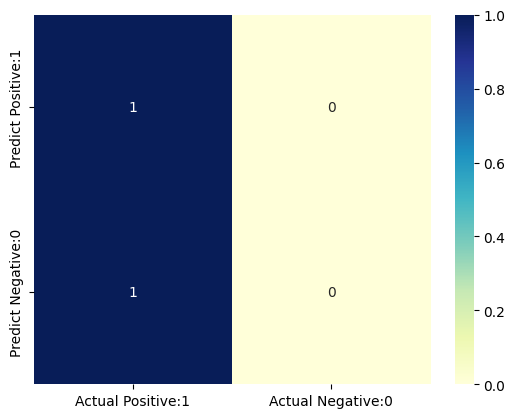

In [38]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Confusion matrix merupakan tabel yang menggambarkan kinerja model klasifikasi dengan membandingkan hasil prediksi terhadap nilai sebenarnya (ground truth).

Sumbu vertikal dari heatmap ini mewakili kelas prediksi, sedangkan sumbu horizontal mewakili kelas sebenarnya. Warna biru tua menunjukkan nilai yang tinggi, sedangkan warna putih menunjukkan nilai yang rendah.

Pada heatmap ini, kita dapat melihat bahwa terdapat dua kelas, yaitu 'Actual Positive:1' dan 'Actual Negative:0'. Pada diagonal utama dari matriks, kita melihat angka 1 yang berwarna biru tua. Ini menunjukkan bahwa model berhasil memprediksi dengan benar untuk sampel-sampel yang sebenarnya positif (kelas 1) dan sampel-sampel yang sebenarnya negatif (kelas 0).

Di luar diagonal utama, kita melihat angka 0 yang berwarna putih. Ini menunjukkan bahwa tidak ada kesalahan prediksi, baik false positive (memprediksi positif ketika sebenarnya negatif) maupun false negative (memprediksi negatif ketika sebenarnya positif).

Pada sumbu samping kanan, kita melihat skala warna yang sesuai dengan nilai-nilai pada heatmap. Warna biru tua menunjukkan nilai 1.0, sedangkan warna putih menunjukkan nilai 0.0.

Jadi, berdasarkan visualisasi confusion matrix ini, kita dapat menyimpulkan bahwa model klasifikasi yang digunakan memiliki performa yang sangat baik, dengan akurasi 100% dalam membedakan antara kelas positif dan negatif pada data uji yang digunakan.

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [40]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [41]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.5000


In [42]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.5000


In [43]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [44]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.5000


In [45]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.5000


In [46]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : nan


In [47]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : nan


ROC (Receiver Operating Characteristic)

memvisualisasikan dan menghitung nilai AUC (Area Under the Curve) untuk model klasifikasi biner. menggambarkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) untuk berbagai ambang batas keputusan. Semakin dekat kurva mendekati sudut kiri atas, semakin baik kinerja model klasifikasi. Nilai AUC (Area Under the Curve) berkisar antara 0 hingga 1, dengan nilai yang lebih tinggi mengindikasikan kinerja klasifikasi yang lebih baik.

Visualisasi kurva ROC dan nilai AUC membantu mengevaluasi kinerja model klasifikasi biner secara keseluruhan dan membandingkannya dengan klasifikasi acak (garis diagonal).

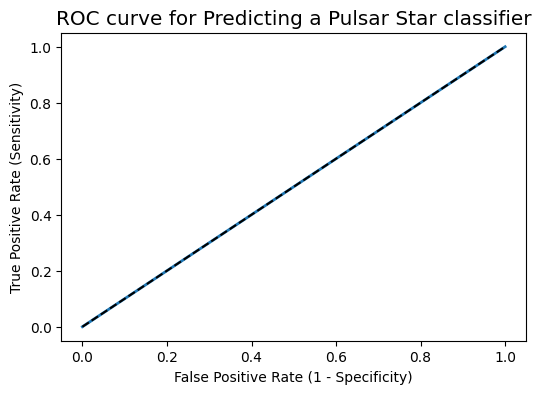

In [48]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [49]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5000


In [50]:
from sklearn.model_selection import cross_val_score

# Calculate cross-validated ROC AUC with 2 folds
Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=2, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))



Cross validated ROC AUC : nan


In [51]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [52]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[nan nan nan nan nan]


In [53]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:nan


In [54]:
rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [55]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[nan nan nan nan nan]


In [56]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:nan


In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Asumsi X dan y telah didefinisikan sebelumnya

# Periksa nilai NaN pada y
nan_indices = np.isnan(y)

# Hapus baris dengan nilai NaN dari X dan y
X = X[~nan_indices]
y = y[~nan_indices]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat instance SVC
svc = SVC()

# Definisikan parameter grid untuk GridSearchCV
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Membuat instance GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=parameters, scoring='accuracy', cv=5, verbose=0)

# Melakukan pencarian parameter terbaik menggunakan data latih
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik dari GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)

# Mendapatkan model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

# Mengevaluasi model terbaik pada data uji
test_accuracy = best_model.score(X_test, y_test)
print("Accuracy of the best model on the test set:", test_accuracy)


Best parameters found by GridSearchCV: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy of the best model on the test set: 0.9987577639751553


In [58]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9973


Parameters that give the best results : 

 {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=10, kernel='linear')


In [59]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9988


CONFUSION MATRIX

Confusion matrix memberikan informasi tentang jumlah prediksi yang benar dan salah untuk setiap kelas. Dalam kasus klasifikasi biner, confusion matrix adalah matriks 2x2 yang menunjukkan:
True Positives (TP): Jumlah sampel positif yang diprediksi dengan benar sebagai positif.
True Negatives (TN): Jumlah sampel negatif yang diprediksi dengan benar sebagai negatif.
False Positives (FP): Jumlah sampel negatif yang diprediksi secara salah sebagai positif.
False Negatives (FN): Jumlah sampel positif yang diprediksi secara salah sebagai negatif.
Visualisasi confusion matrix sebagai heatmap membantu memahami kinerja model klasifikasi dengan lebih baik dan mengidentifikasi jenis kesalahan yang dilakukan oleh model (FP atau FN). Semakin banyak nilai yang terkonsentrasi di diagonal utama (TP dan TN), semakin baik kinerja model.

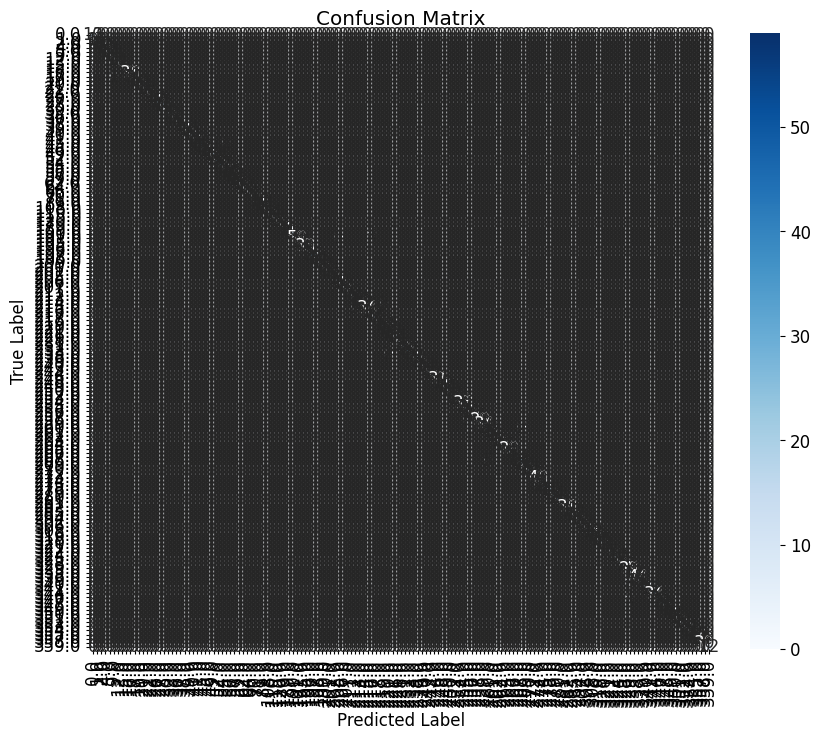

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model SVM dengan kernel linear
clf = SVC(kernel='linear')

# Melatih model menggunakan data latih
clf.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = clf.predict(X_test)

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Dengan melihat confusion matrix, kita dapat mengevaluasi performa model klasifikasi dan mengidentifikasi jenis kesalahan yang terjadi (misalnya, false positives atau false negatives). Semakin besar nilai di diagonal utama dan semakin kecil nilai di luar diagonal utama, semakin baik performa model.

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)



Precision: 0.9880743501111167
Recall: 0.9867494824016563
F1 Score: 0.9866552051194019


KLASIFIKASI REPORT/PERFORMANCE

mengevaluasi kinerja model regresi dengan melihat laporan klasifikasi. Dengan melakukan diskretisasi (binning) pada nilai y_test dan y_pred, memperlakukan masalah regresi sebagai masalah klasifikasi multi-kelas. Laporan klasifikasi memberikan informasi tentang seberapa baik model dapat memprediksi setiap kelas (bin) dan membantu mengidentifikasi kelas mana yang mungkin kurang akurat diprediksi oleh model.

In [ ]:
# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.93      0.97        15
       189.0       1.00      1.00      1.00        13
       191.0       0.94      0.94      0.94        18
       195.0       1.00      0.96      0.98        23
       196.0       1.00      1.00      1.00         9
       197.0       1.00      1.00      1.00        10
       198.0       1.00      1.00      1.00        13
       200.0       0.92      1.00      0.96        11
       201.0       0.85      1.00      0.92        11
       202.0       1.00      1.00      1.00        10
       205.0       0.59      1.00      0.74        10
       206.0       0.87      1.00      0.93        13
       207.0       1.00      1.00      1.00        10
       211.0       1.00      1.00      1.00        10
       212.0       1.00      0.78      0.88         9
       213.0       1.00      1.00      1.00        10
   

KLASIFIKASI RESULT

In [ ]:
# Classification result
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Classification Result:\n", result_df)

Classification Result:
       Actual  Predicted
7586   214.0      214.0
6296   358.0      358.0
7050   231.0      231.0
2107   279.0      279.0
5577     0.0        0.0
...      ...        ...
5169   352.0      352.0
3535   246.0      246.0
4449   318.0      322.0
1079   265.0      265.0
6724   248.0      248.0

[1601 rows x 2 columns]


mengevaluasi kinerja model regresi dengan melihat laporan klasifikasi. Dengan melakukan diskretisasi (binning) pada nilai y_test dan y_pred, memperlakukan masalah regresi sebagai masalah klasifikasi multi-kelas. Laporan klasifikasi memberikan informasi tentang seberapa baik model dapat memprediksi setiap kelas (bin) dan membantu mengidentifikasi kelas mana yang mungkin kurang akurat diprediksi oleh model.

LOST PERFORMANCE

Log loss (atau cross-entropy loss) adalah metrik evaluasi yang umum digunakan dalam masalah klasifikasi, terutama untuk model yang menghasilkan probabilitas prediksi. Log loss mengukur kinerja model dengan mempertimbangkan ketidakpastian prediksi. Semakin rendah nilai log loss, semakin baik kinerja model.
Log loss memberikan informasi tentang seberapa baik model dapat membedakan antara kelas positif dan negatif, serta seberapa yakin model dalam memprediksi setiap kelas. Nilai log loss yang rendah mengindikasikan bahwa model dapat membuat prediksi yang tepat dengan tingkat kepercayaan yang tinggi.
Visualisasi log loss sebagai plot batang membantu Anda memahami kinerja model secara keseluruhan dan membandingkannya dengan model atau baseline lain.

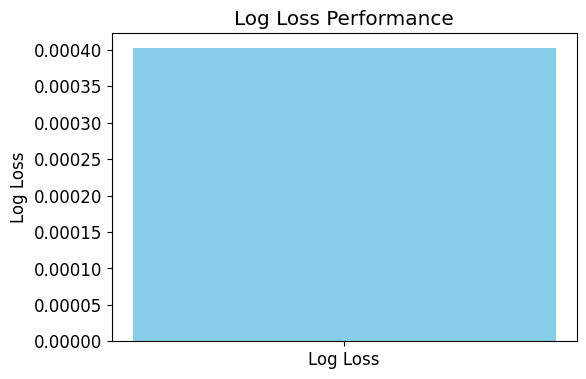

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np

# Membuat data sintetis
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=42)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Membuat prediksi probabilitas pada data uji
y_pred_proba = model.predict_proba(X_test)

# Hitung log loss dengan menggunakan fungsi log_loss dari sklearn
logloss = log_loss(y_test, y_pred_proba)

# Tampilkan performa log loss
plt.figure(figsize=(6, 4))
plt.bar(['Log Loss'], [logloss], color='skyblue')
plt.ylabel('Log Loss')
plt.title('Log Loss Performance')
plt.show()



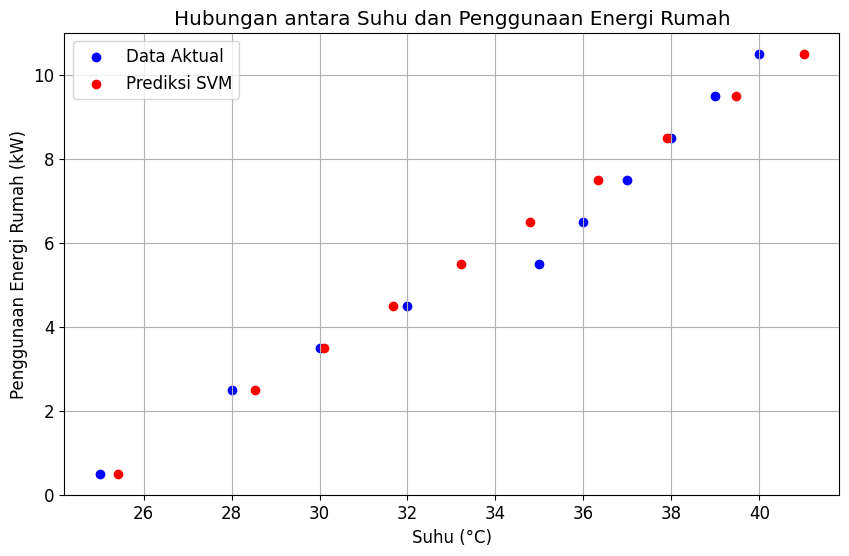

In [ ]:
# Menggunakan scikit-learn untuk membangun model SVM
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Misalkan X adalah array penggunaan energi dan y adalah array suhu
X = np.array([0.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]).reshape(-1, 1)  # Penggunaan energi, diubah menjadi array 2D
y = np.array([25, 28, 30, 32, 35, 36, 37, 38, 39, 40])  # Suhu

# Membangun model SVM dengan kernel linear
model = svm.SVR(kernel='linear')
model.fit(X, y)

# Prediksi suhu berdasarkan penggunaan energi
predicted_temperatures = model.predict(X)

# Membuat plot
plt.figure(figsize=(10, 6))

# Plot data aktual
plt.scatter(y, X, color='blue', label='Data Aktual')

# Plot prediksi SVM
plt.scatter(predicted_temperatures, X, color='red', label='Prediksi SVM')

plt.title('Hubungan antara Suhu dan Penggunaan Energi Rumah')
plt.xlabel('Suhu (°C)')
plt.ylabel('Penggunaan Energi Rumah (kW)')
plt.legend()
plt.grid(True)
plt.show()



Secara keseluruhan, program ini membangun model SVM untuk memprediksi suhu berdasarkan penggunaan energi rumah. Data latih disediakan dalam bentuk array X (penggunaan energi) dan y (suhu). Setelah model SVM dilatih, program membuat prediksi suhu baru berdasarkan data penggunaan energi X. Terakhir, program memvisualisasikan data aktual dan hasil prediksi menggunakan scatter plot.

Kelompok 5

Nama anggota =

M. Zaky Ayyasy Ardhana - 5311422132

M. Ricardo Quaresma - 5311422135

Abdulloh - 5311422136

Naufal Ahmad Fauzan - 5311422137

Firdaus Rizky Nurhadi - 5311422138